## Karthikeyan A
## 3122 21 5001 041
## Assignment 6


# Human Activity Recognition Using Smartphones dataset

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones?resource=download


In [14]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
train_data = pd.read_csv("archive/train.csv")
test_data = pd.read_csv("archive/test.csv")

In [4]:
train_data.shape

(7352, 563)

In [25]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Cluster
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,1.482182
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,0.759438
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,1.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,2.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,2.000000


In [28]:
train_data.duplicated().sum()

0

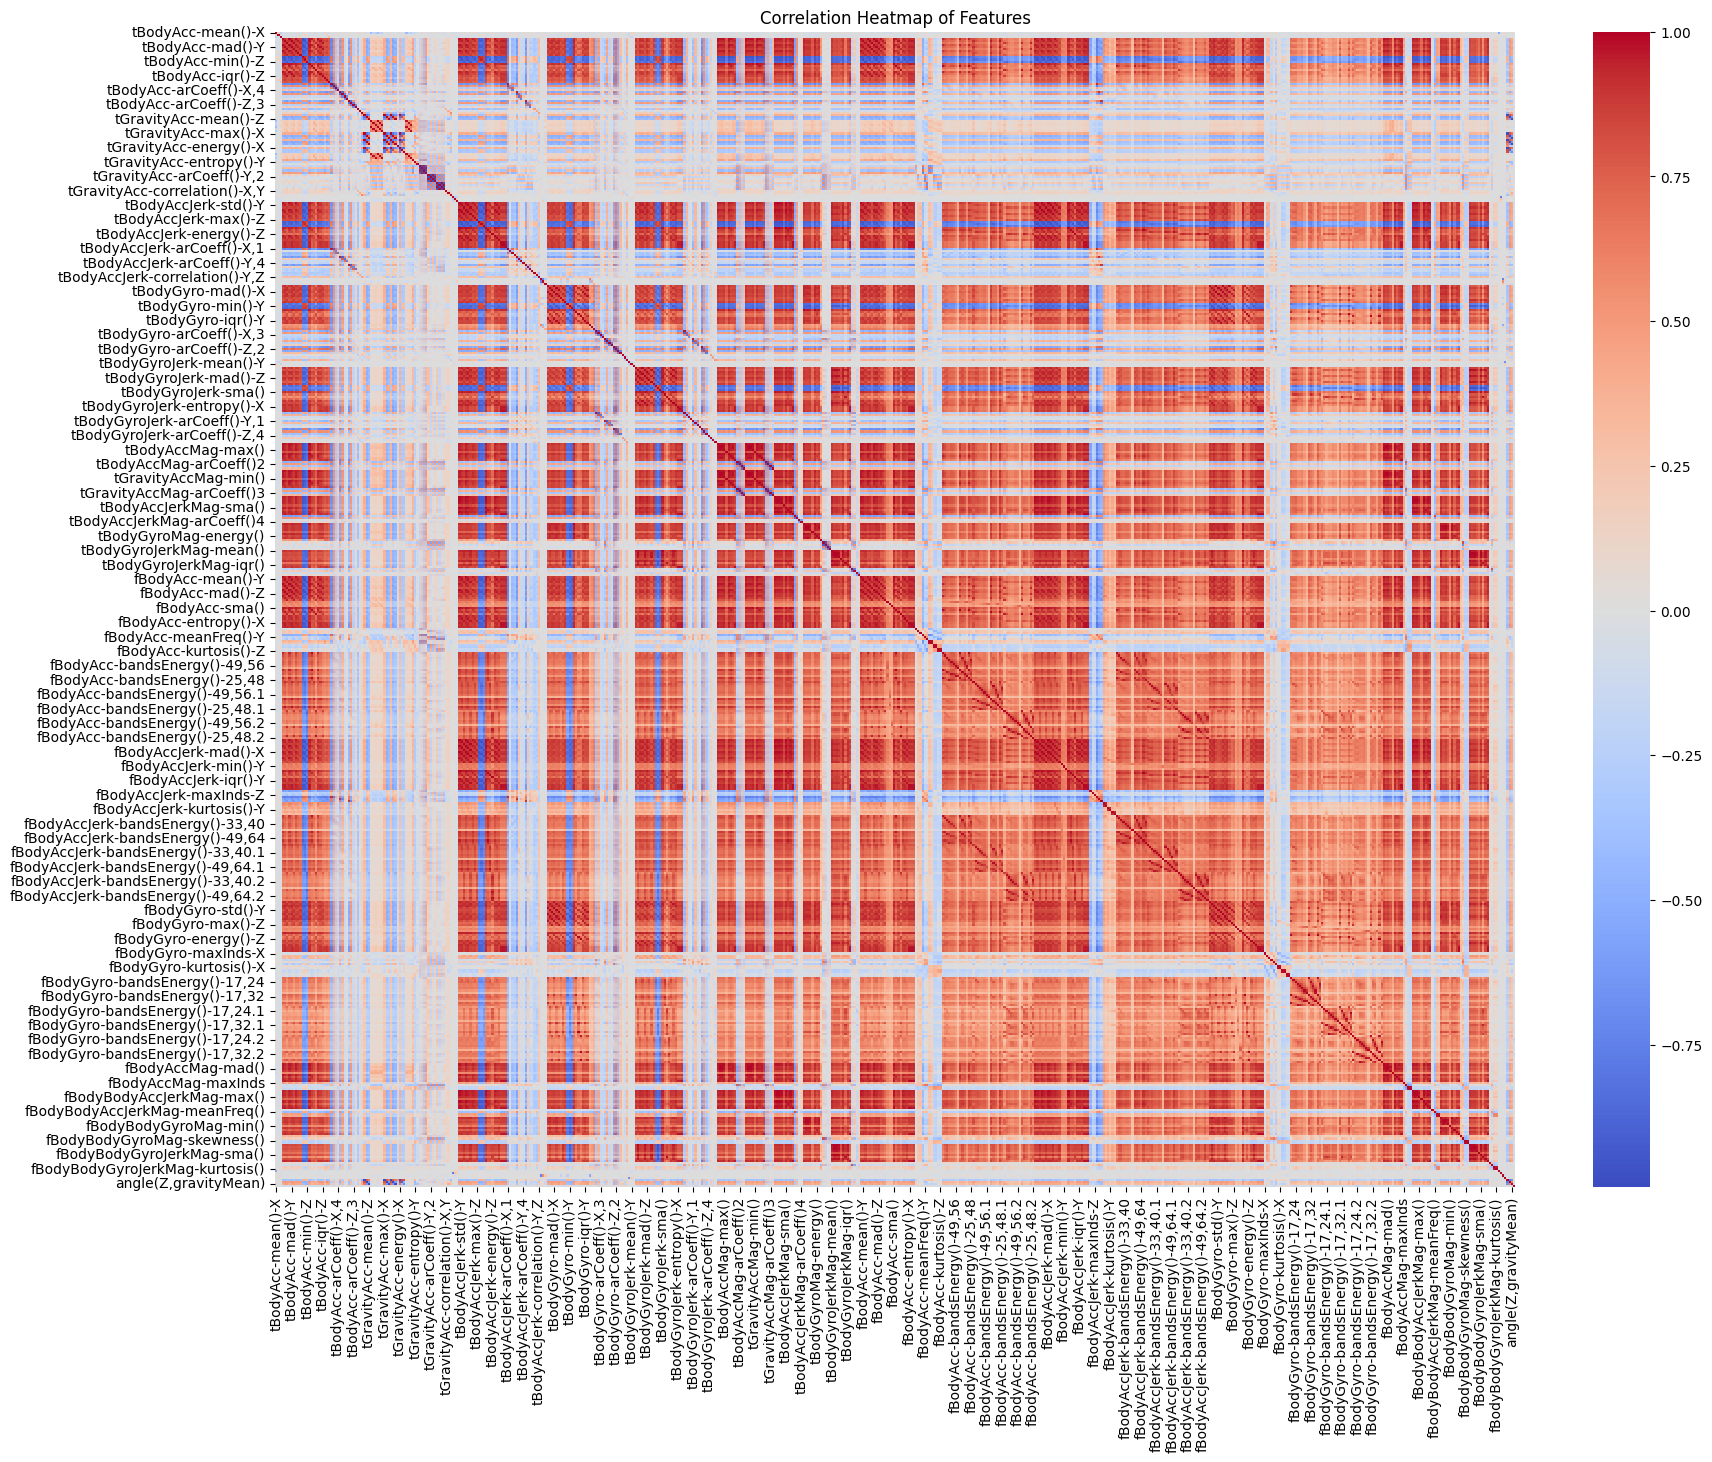

In [9]:
# Exclude non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
train_data_numeric = train_data[numeric_columns]

# Calculate the correlation matrix
corr_matrix = train_data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = train_data.drop(columns=["subject", "Activity"])
y = train_data["Activity"]

# Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_features = X.columns[indices][:10]

print("Top 10 features based on importance scores:")
print(top_features)


Top 10 features based on importance scores:
Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)',
       'tGravityAcc-mean()-Y', 'tGravityAcc-energy()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y',
       'tGravityAcc-min()-Y', 'tGravityAcc-energy()-Y'],
      dtype='object')


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the top 10 features based on importance scores
top_features = ['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)',
                'tGravityAcc-mean()-Y', 'tGravityAcc-energy()-X',
                'angle(Y,gravityMean)', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y',
                'tGravityAcc-min()-Y', 'tGravityAcc-energy()-Y']

# Create a new DataFrame with only the top features
X = train_data[top_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # You need to choose the number of clusters
kmeans.fit(X_scaled)

# Predict cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
train_data['Cluster'] = cluster_labels

# Filter out non-numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns





In [23]:
from sklearn.metrics import silhouette_score

# After fitting the kmeans model
silhouette_coeff = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Coefficient: ", (silhouette_coeff * 100) ,"% Higher silhouette scores indicate better clustering")

Silhouette Coefficient: %.3f 56.60532382348744 % Higher silhouette scores indicate better clustering


# GitHub Link https://github.com/KKBUGHUNTER/Machine-Learning-Lab/tree/main/Assignment-06

### learning outcome
- Understanding of K-means clustering algorithm
- Data preprocessing
- Feature visualization
- Interpretation of clustering results

### Inference
- Feature importance analysis: Identifies key variables driving model predictions.
- Clustering: Uncovers patterns by grouping similar data points together.
- Silhouette scores: Quantify clustering effectiveness by assessing cluster separation and cohesion.